<a href="https://colab.research.google.com/github/SJKIM2253/Statistics_with_Python/blob/master/190722_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

p. 352

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 로지스틱 회귀
from statsmodels.api import Logit
# 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
df_raw = pd.read_csv('/content/drive/My Drive/BigDataAnalysis/통신고객이탈.csv')
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [119]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [0]:
df_raw.fillna(df_raw.mean(), inplace = True)

In [121]:
# 명목형 변수 목록
# 명목형 변수들의 distinct한 값의 수(왜 범주형 데이터의 unique 값을 알고자 하는가? / for loop을 어떻게 작성하는가?)
# 범주형 데이터의 범주를 별도
obj_cols = df_raw.select_dtypes("object").columns
for col in obj_cols:
    _n= len(df_raw[col].value_counts())
    print(col, " : ", str(_n))

CHURN  :  2
CUSTOMER_ID  :  930
GENDER  :  2
CHARGE_TYPE  :  5
HANDSET  :  11
USAGE_BAND  :  6


In [122]:
df_raw['CHURN'] = np.where(df_raw["CHURN"]  == 'Active', 0, 1)
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [123]:
# fillna : 결측치 대체 함수
# JOB 변수의 결측치는 'Other'로 대체, inplace: fillna 함수 적용 후 df_raw 데이터에 저장, False면 저장 안 함
# df_raw['JOB'].fillna("Other", inplace = True)
# 숫자형 변수의 결측치는 해당 변수의 평균값 입력 : df_raw.mean() 각 변수별 평균 계산 후 결측치 대체
df_raw_dropped = df_raw.drop("CUSTOMER_ID", axis=1)
# train/data data를 7:3 으로 분할
df_train, df_test = train_test_split(df_raw_dropped, test_size = 0.3, random_state=1234)

print("train data size = {}".format(df_train.shape))
print("test data size = {}".format(df_test.shape))

train data size = (651, 14)
test data size = (279, 14)


In [124]:
df_train

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
64,0,F,40,CAT 200,S50,MedHigh,36.00,2,556,1436.4,8,74.0,736,1862.9
201,0,F,41,Play 300,ASAD170,Med,45.33,11,73,403.2,15,39.0,204,962.4
37,0,F,26,CAT 200,S50,MedHigh,55.07,0,546,1228.2,0,0.0,588,1294.8
403,0,F,24,CAT 100,WC95,Med,50.83,2,249,445.2,6,15.0,274,527.1
322,0,M,32,Play 100,BS210,Med,55.63,10,125,232.2,4,112.8,159,525.9
586,0,F,44,CAT 100,BS110,Med,11.40,0,266,636.6,28,61.2,298,732.3
831,1,M,21,Play 100,S50,MedLow,22.83,1,43,69.6,22,57.0,152,352.8
746,0,M,17,Play 300,S80,Med,18.07,4,1,373.8,23,36.6,181,821.4
500,0,M,16,CAT 200,BS110,MedHigh,33.23,2,418,837.0,15,48.0,566,1318.5
421,0,F,57,CAT 100,BS110,Med,29.23,7,197,502.8,9,48.0,284,983.1


In [125]:
# from_formula 함수를 이용하여 변수 역할 지정

#C()는 더미변수환
log_model = Logit.from_formula("""CHURN ~	C(GENDER)+	AGE+	C(CHARGE_TYPE)+	C(HANDSET)+	C(USAGE_BAND) + SERVICE_DURATION+
DROPPED_CALLS	+PEAK_CALLS_NO+	PEAK_CALLS_TIME+	WEEKEND_CALLS_NO+	WEEKEND_CALLS_TIME+	TOTAL_CALLS_NO+	TOTAL_CALLS_TIME""", df_train)
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.253230
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  651
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                           29
Date:                Mon, 22 Jul 2019   Pseudo R-squ.:                  0.5059
Time:                        05:18:09   Log-Likelihood:                -164.85
converged:                      False   LL-Null:                       -333.64
Covariance Type:            nonrobust   LLR p-value:                 2.736e-54
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -24.1057   2065.466     -0.012      0.991   -4072.345    4024.133
C(GENDER)[T.M]   

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [126]:
# test 데이터 예측
y_pred = log_result.predict(df_test)
# 0과 1의 값을 가진 class로 변환
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

# 결과값 : index 명과 

530    0
534    0
699    0
641    0
319    0
dtype: int64

In [127]:
# 실제 test 데이터의 목표변수와 test 데이터의 예측값 비교
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["CHURN"],y_pred_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["CHURN"],y_pred_class)))

Accuracy: 0.914

Confusion Matrix:
[[227   8]
 [ 16  28]]


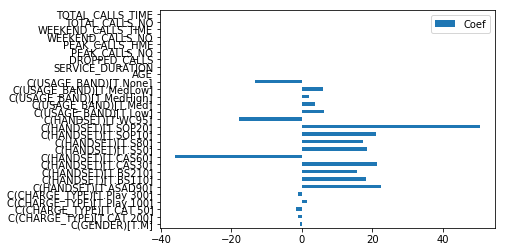

In [128]:
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh( y = "Coef")

In [175]:
# p.348
df_char = df_raw.select_dtypes(include = "object")
df_numeric = df_raw.select_dtypes(exclude = 'object')
df_char = df_char.drop("CUSTOMER_ID", axis = 1)
# df_numeric = df_numeric.drop("CHURN", axis = 1)

scaler = StandardScaler()
df_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(df_numeric_scaled, columns = df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
#df_scaled = pd.concat([df_raw["CHURN"], df_scaled], axis = 1)
df_scaled.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,-0.489898,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,F,CAT 100,ASAD170,Med
1,-0.489898,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,M,CAT 100,S50,Med
2,-0.489898,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,M,CAT 100,ASAD170,Med
3,-0.489898,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,M,CAT 100,ASAD170,Med
4,-0.489898,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,F,CAT 100,S50,Med


In [168]:
df_scaled["CHURN"] = np.where(df_scaled["CHURN"] > 0,1,0)
df_scaled.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,F,CAT 100,ASAD170,Med
1,0,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,M,CAT 100,S50,Med
2,0,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,M,CAT 100,ASAD170,Med
3,0,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,M,CAT 100,ASAD170,Med
4,0,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,F,CAT 100,S50,Med


In [0]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

In [170]:
scaled_log_model = Logit.from_formula("""CHURN ~	C(GENDER)+	AGE+	C(CHARGE_TYPE)+	C(HANDSET)+	C(USAGE_BAND) + 
SERVICE_DURATION+	DROPPED_CALLS	+PEAK_CALLS_NO+	PEAK_CALLS_TIME+	WEEKEND_CALLS_NO+	WEEKEND_CALLS_TIME+	TOTAL_CALLS_NO+	TOTAL_CALLS_TIME""", df_scaled_train)
scaled_log_result = scaled_log_model.fit()
print(scaled_log_result.summary())

         Current function value: 0.253230
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  651
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                           29
Date:                Mon, 22 Jul 2019   Pseudo R-squ.:                  0.5059
Time:                        05:38:16   Log-Likelihood:                -164.85
converged:                      False   LL-Null:                       -333.64
Covariance Type:            nonrobust   LLR p-value:                 2.736e-54
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -22.6857   2065.406     -0.011      0.991   -4070.807    4025.436
C(GENDER)[T.M]   

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


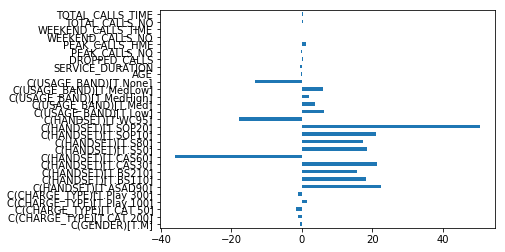

In [171]:
df_log_scaled_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])

df_log_scaled_coef.plot.barh( y = "Coef", legend = False)

In [172]:
# test 데이터 예측
y_pred = scaled_log_result.predict(df_test)
# 0과 1의 값을 가진 class로 변환
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

# 결과값 : index 명과 

530    1
534    1
699    1
641    1
319    1
dtype: int64

In [173]:
# 실제 test 데이터의 목표변수와 test 데이터의 예측값 비교
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["CHURN"],y_pred_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["CHURN"],y_pred_class)))

Accuracy: 0.154

Confusion Matrix:
[[  0 235]
 [  1  43]]
